In [1]:
# @title Default title text
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


✅ Data loaded successfully!
Train shape: (112799, 785)
Test shape: (18799, 785)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 99s 109ms/step - accuracy: 0.4654 - loss: 1.9262 - val_accuracy: 0.8232 - val_loss: 0.5314
Epoch 2/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 98s 111ms/step - accuracy: 0.7703 - loss: 0.7151 - val_accuracy: 0.8469 - val_loss: 0.4568
Epoch 3/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 94s 106ms/step - accuracy: 0.8009 - loss: 0.6080 - val_accuracy: 0.8573 - val_loss: 0.4224
Epoch 4/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 147s 112ms/step - accuracy: 0.8188 - loss: 0.5426 - val_accuracy: 0.8652 - val_loss: 0.4009
Epoch 5/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 94s 106ms/step - accuracy: 0.8340 - loss: 0.4978 - val_accuracy: 0.8656 - val_loss: 0.3905
Epoch 6/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 141s 106ms/step - accuracy: 0.8409 - loss: 0.4694 - val_accuracy: 0.8699 - val_loss: 0.3794
Epoch 7/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 93s 105ms/step - accuracy: 0.8476 - loss: 0.4470 - val_accuracy: 0.8744 - val_loss: 0.3676
Epoch 8/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 94s 107ms/step - accuracy: 0.8553 - loss:

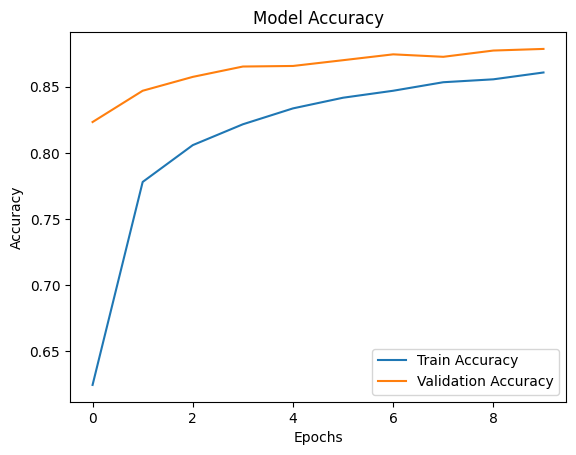

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


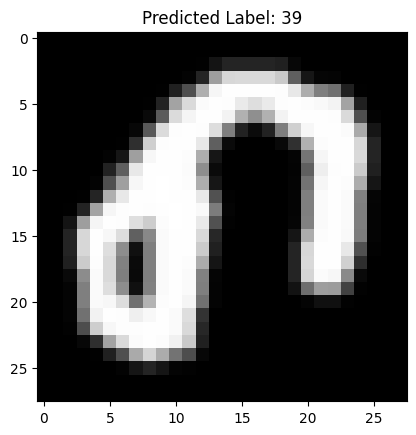

In [2]:
# @title Default title text
# ===============================
# Handwritten Character Recognition (EMNIST)
# ===============================


# Step 2: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Step 3: Load EMNIST Dataset from Google Drive
# Update this path to your uploaded CSV file
train_path = "/content/drive/MyDrive/HandWrittenRecognization/archive/emnist-balanced-train.csv"
test_path = "/content/drive/MyDrive/HandWrittenRecognization/archive/emnist-balanced-test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("✅ Data loaded successfully!")
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Step 4: Separate features & labels
y_train = train_df.iloc[:, 0].values
X_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values

# Step 5: Normalize & Reshape
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Step 6: One-hot encode labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Step 7: Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Step 8: Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 9: Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

# Step 10: Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

# Step 11: Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 12: Test Prediction on One Sample
sample_idx = 0
sample_image = X_test[sample_idx].reshape(1, 28, 28, 1)
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)

plt.imshow(X_test[sample_idx].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()


Saving handwritten.jpeg to handwritten (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


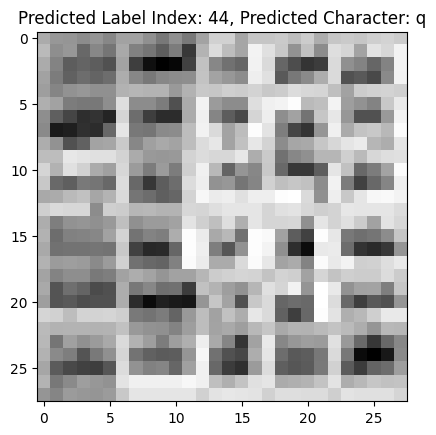

In [5]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

for filename in uploaded.keys():
  img = Image.open(filename).convert('L')  # Convert to grayscale
  img = img.resize((28, 28))  # Resize to 28x28
  img_array = np.array(img)
  img_array = img_array / 255.0  # Normalize
  img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for the model

  # Assuming 'model' is the trained CNN model from the previous cells
  if 'model' in locals():
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)

    # Assuming EMNIST balanced dataset has 47 classes (0-9, A-Z, a-z)
    # We need a mapping from label index to character.
    # This is a basic mapping, you might need a more accurate one
    # based on the specific EMNIST balanced dataset
    emnist_mapping = {
        0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
        10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I',
        19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R',
        28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z',
        36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q',
        45: 'r', 46: 't'
    }

    predicted_character = emnist_mapping.get(predicted_label, 'Unknown')

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Label Index: {predicted_label}, Predicted Character: {predicted_character}")
    plt.show()
  else:
    print("Error: The model is not trained yet. Please run the previous cells to train the model.")